# Basic example for using AeroMAPS with Jupyter Notebook

This document represents both an example and a tutorial for using the basic functions of AeroMAPS to simulate and evaluate a transition scenario for the aviation sector.  It is written in the form of a Jupyter Notebook to facilitate its use. The user will be able to adapt this notebook and couple it with other notebooks proposed in the documentation.

## Load and process

First, the user has to load the framework and generate a process.

In [1]:
%matplotlib widget
from cast.core.process import AeromapsProcess
from cast.core.models import models_simple

In [2]:
process = AeromapsProcess(read_json=True, models=models_simple)

## Set up variables

The user can then set the different parameters of the model to generate its scenario. The list of the float inputs can be displayed using this command.

In [3]:
process.list_float_inputs()

{'rpk_short_range_measures_final_impact': 0.0,
 'rpk_medium_range_measures_final_impact': 0.0,
 'rpk_long_range_measures_final_impact': 0.0,
 'rpk_short_range_measures_start_year': 2051,
 'rpk_medium_range_measures_start_year': 2051,
 'rpk_long_range_measures_start_year': 2051,
 'rpk_short_range_measures_duration': 5.0,
 'rpk_medium_range_measures_duration': 5.0,
 'rpk_long_range_measures_duration': 5.0,
 'short_range_rpk_share_2019': 27.2,
 'medium_range_rpk_share_2019': 35.1,
 'long_range_rpk_share_2019': 37.7,
 'covid_start_year': 2020,
 'covid_rpk_drop_start_year': 66.0,
 'covid_end_year': 2024,
 'covid_end_year_reference_rpk_ratio': 100.0,
 'growth_rate_2020_2030_short_range': 3.0,
 'growth_rate_2030_2040_short_range': 3.0,
 'growth_rate_2040_2050_short_range': 3.0,
 'growth_rate_2020_2030_medium_range': 3.0,
 'growth_rate_2030_2040_medium_range': 3.0,
 'growth_rate_2040_2050_medium_range': 3.0,
 'growth_rate_2020_2030_long_range': 3.0,
 'growth_rate_2030_2040_long_range': 3.0,
 '

 In the following, some main parameters are for instance set up.

In [4]:
# Air traffic evolution

## Growth rate by category and decade [%]
process.parameters.growth_rate_2020_2030_short_range = 3
process.parameters.growth_rate_2030_2040_short_range = 3
process.parameters.growth_rate_2040_2050_short_range = 3
process.parameters.growth_rate_2020_2030_medium_range = 3
process.parameters.growth_rate_2030_2040_medium_range = 3
process.parameters.growth_rate_2040_2050_medium_range = 3
process.parameters.growth_rate_2020_2030_long_range = 3
process.parameters.growth_rate_2030_2040_long_range = 3
process.parameters.growth_rate_2040_2050_long_range = 3
process.parameters.growth_rate_2020_2030_freight = 3
process.parameters.growth_rate_2030_2040_freight = 3
process.parameters.growth_rate_2040_2050_freight = 3

In [5]:
# Aircraft fleet and operation evolution - Aircraft load factor

## Aircraft load factor in 2050 [%]
process.parameters.load_factor_end_year = 85 # 2019 value: 82.399312

In [6]:
# Aircraft fleet and operation evolution - Aircraft efficiency using the top-down approach

## Drop-in aircraft
### Mean annual efficiency gains by category [%]
process.parameters.energy_per_ask_short_range_dropin_fuel_gain = 1.5
process.parameters.energy_per_ask_medium_range_dropin_fuel_gain = 1.5
process.parameters.energy_per_ask_long_range_dropin_fuel_gain = 1.5

## Hydrogen aircraft
### Values for setting logistic functions by category
process.parameters.hydrogen_final_market_share_short_range = 50.0  # [%]
process.parameters.hydrogen_introduction_year_short_range = 2035
process.parameters.hydrogen_final_market_share_medium_range = 0.0  # [%]
process.parameters.hydrogen_introduction_year_medium_range = 2051
process.parameters.hydrogen_final_market_share_long_range = 0.0  # [%]
process.parameters.hydrogen_introduction_year_long_range = 2051
process.parameters.fleet_renewal_duration = 20.0
### Relative energy consumption for hydrogen aircraft with respect to drop-in aircraft [%]
process.parameters.relative_energy_per_ask_hydrogen_wrt_dropin_short_range = 0.0
process.parameters.relative_energy_per_ask_hydrogen_wrt_dropin_medium_range = 10.0
process.parameters.relative_energy_per_ask_hydrogen_wrt_dropin_long_range = 20.0

In [7]:
# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function
process.parameters.operations_final_gain = 8.0  # [%]
process.parameters.operations_start_year = 2025
process.parameters.operations_duration = 25.0

In [8]:
# Aircraft energy - Introduction of alternative drop-in fuels

## Share of alternative fuels in the drop-in fuel mix by decade (the rest being supplemented by kerosene) [%]
process.parameters.biofuel_share_2030 = 4.8
process.parameters.biofuel_share_2040 = 24.0
process.parameters.biofuel_share_2050 = 35.0
process.parameters.electrofuel_share_2030 = 1.2
process.parameters.electrofuel_share_2040 = 10.0
process.parameters.electrofuel_share_2050 = 35.0

In [9]:
# Environmental limits

## Carbon budgets and Carbon Dioxide Removal [GtCO2]
process.parameters.net_carbon_budget = 850.0
process.parameters.carbon_dioxyde_removal_2100 = 280.0

## Available energy resources in 2050 [EJ]
process.parameters.waste_biomass = 12
process.parameters.crops_biomass = 63
process.parameters.forest_residues_biomass = 17
process.parameters.agricultural_residues_biomass = 57
process.parameters.algae_biomass = 15
process.parameters.available_electricity = 250.0

In [10]:
# Allocation settings

## Aviation share of the global (equivalent) carbon budget [%]
process.parameters.aviation_carbon_budget_allocated_share = 2.6
process.parameters.aviation_equivalentcarbonbudget_allocated_share = 5.1

## Aviation share of the global energy resources (biomass and electricity) [%]
process.parameters.aviation_biomass_allocated_share = 5.0
process.parameters.aviation_electricity_allocated_share = 5.0

In [11]:
# Various environmental settings

## Share of biofuel production pathways by decade (the rest being completed by AtJ processes) [%]
process.parameters.biofuel_hefa_fog_share_2030 = 100.0
process.parameters.biofuel_hefa_fog_share_2040 = 0.7
process.parameters.biofuel_hefa_fog_share_2050 = 0.7
process.parameters.biofuel_hefa_others_share_2030 = 0.0
process.parameters.biofuel_hefa_others_share_2040 = 3.8
process.parameters.biofuel_hefa_others_share_2050 = 3.8
process.parameters.biofuel_ft_others_share_2030 = 0
process.parameters.biofuel_ft_others_share_2040 = 76.3
process.parameters.biofuel_ft_others_share_2050 = 76.3
process.parameters.biofuel_ft_msw_share_2030 = 0.0
process.parameters.biofuel_ft_msw_share_2040 = 7.4
process.parameters.biofuel_ft_msw_share_2050 = 7.4

## Emission factors for electricity by decade (2019 value: 429 gCO2/kWh)
process.parameters.electricity_emission_factor_2020 = 429
process.parameters.electricity_emission_factor_2030 = 200
process.parameters.electricity_emission_factor_2040 = 100
process.parameters.electricity_emission_factor_2050 = 30

## Share of hydrogen production pathways by decade (the rest being completed by production via coal without CCS) [%]
## Distribution in 2019: Gas without CCS (71%), Coal without CCS (27%), Electrolysis (2%), Others with CCS (0%), Co-products not taken into account
process.parameters.hydrogen_electrolysis_share_2030 = 100
process.parameters.hydrogen_electrolysis_share_2040 = 100
process.parameters.hydrogen_electrolysis_share_2050 = 100
process.parameters.hydrogen_gas_ccs_share_2030 = 0
process.parameters.hydrogen_gas_ccs_share_2040 = 0
process.parameters.hydrogen_gas_ccs_share_2050 = 0
process.parameters.hydrogen_coal_ccs_share_2030 = 0
process.parameters.hydrogen_coal_ccs_share_2040 = 0
process.parameters.hydrogen_coal_ccs_share_2050 = 0
process.parameters.hydrogen_gas_share_2030 = 0
process.parameters.hydrogen_gas_share_2040 = 0
process.parameters.hydrogen_gas_share_2050 = 0

## Compute

Once all the parameters have been set up, the user can compute.

In [12]:
process.compute()

## Results

The user can then display the results. The user has access to float outputs but also to annual data outputs, with the possibility of choosing the output.

In [13]:
process.data["float_outputs"]

{'cagr_rpk_short_range': 2.5948580077686634,
 'cagr_rpk_medium_range': 2.5948580077686634,
 'cagr_rpk_long_range': 2.5948580077686634,
 'cagr_rpk': 2.5948580077686634,
 'prospective_evolution_rpk_short_range': 115.65912675438419,
 'prospective_evolution_rpk_medium_range': 115.65912675438427,
 'prospective_evolution_rpk_long_range': 115.65912675438427,
 'prospective_evolution_rpk': 115.65912675438427,
 'cagr_rtk': 2.5948580077686634,
 'prospective_evolution_rtk': 115.65912675438419,
 'gross_carbon_budget': 1130.0,
 'gross_carbon_budget_2050': 797.2411428790518,
 'aviation_carbon_budget': 20.72826971485535,
 'biomass_consumption_end_year': 10.012331819431708,
 'electricity_consumption_end_year': 18.450559621454865,
 'equivalent_gross_carbon_budget': 1574.4444444444443,
 'equivalent_gross_carbon_budget_2050': 1102.610171118651,
 'aviation_equivalent_carbon_budget': 56.23311872705119,
 'solid_waste_biomass': 11.0,
 'oil_crops_biomass': 5.67,
 'sugarystarchy_crops_biomass': 17.64,
 'lignoce

In [14]:
process.data["vector_outputs"]

,aerosol_erf,annual_co2_erf,ask,ask_long_range,ask_long_range_dropin_fuel,ask_long_range_dropin_fuel_share,ask_long_range_hydrogen,ask_long_range_hydrogen_share,ask_medium_range,ask_medium_range_dropin_fuel,ask_medium_range_dropin_fuel_share,ask_medium_range_hydrogen,ask_medium_range_hydrogen_share,ask_short_range,ask_short_range_dropin_fuel,ask_short_range_dropin_fuel_share,ask_short_range_hydrogen,ask_short_range_hydrogen_share,biofuel_atj_efficiency,biofuel_atj_emission_factor,biofuel_atj_share,biofuel_ft_efficiency,biofuel_ft_msw_emission_factor,biofuel_ft_msw_share,biofuel_ft_others_emission_factor,biofuel_ft_others_share,biofuel_hefa_fog_emission_factor,biofuel_hefa_fog_share,biofuel_hefa_fuel_efficiency,biofuel_hefa_oil_efficiency,biofuel_hefa_others_emission_factor,biofuel_hefa_others_share,biofuel_mean_emission_factor,biofuel_share,biomass_atj_consumption,biomass_consumption,biomass_ft_consumption,biomass_hefa_fog_consumption,biomass_hefa_others_consumption,co2_emissions,co2_emissions_2019technology,co2_emissions_2019technology_baseline3,co2_emissions_freight,co2_emissions_including_aircraft_efficiency,co2_emissions_including_energy,co2_emissions_including_load_factor,co2_emissions_including_operations,co2_emissions_long_range,co2_emissions_medium_range,co2_emissions_passenger,co2_emissions_per_rpk,co2_emissions_per_rtk,co2_emissions_short_range,co2_emissions_smooth,co2_erf,co2_erf_smooth,co2_h2o_erf,co2_h2o_nox_contrails_erf,co2_h2o_nox_erf,co2_per_energy_mean,co2_total_erf_ratio,contrails_erf,cumulative_co2_emissions,cumulative_co2_emissions_2019technology,cumulative_co2_emissions_2019technology_baseline3,cumulative_co2_emissions_including_energy,cumulative_co2_emissions_including_load_factor,cumulative_co2_emissions_smooth,cumulative_non_co2_equivalent_emissions,cumulative_total_equivalent_emissions,electricity_consumption,electricity_electrofuel_consumption,electricity_emission_factor,electricity_hydrogen_consumption,electrofuel_emission_factor,...,energy_consumption_short_range_dropin_fuel,energy_consumption_short_range_dropin_fuel_without_operations,energy_consumption_short_range_electrofuel,energy_consumption_short_range_electrofuel_without_operations,energy_consumption_short_range_hydrogen,energy_consumption_short_range_hydrogen_without_operations,energy_consumption_short_range_kerosene,energy_consumption_short_range_kerosene_without_operations,energy_consumption_short_range_without_operations,energy_consumption_without_operations,energy_per_ask_long_range_dropin_fuel,energy_per_ask_long_range_hydrogen,energy_per_ask_mean,energy_per_ask_mean_without_operations,energy_per_ask_medium_range_dropin_fuel,energy_per_ask_medium_range_hydrogen,energy_per_ask_short_range_dropin_fuel,energy_per_ask_short_range_hydrogen,energy_per_ask_without_operations_long_range_dropin_fuel,energy_per_ask_without_operations_long_range_hydrogen,energy_per_ask_without_operations_medium_range_dropin_fuel,energy_per_ask_without_operations_medium_range_hydrogen,energy_per_ask_without_operations_short_range_dropin_fuel,energy_per_ask_without_operations_short_range_hydrogen,energy_per_rtk_freight_dropin_fuel,energy_per_rtk_freight_hydrogen,energy_per_rtk_mean,energy_per_rtk_mean_without_operations,energy_per_rtk_without_operations_freight_dropin_fuel,energy_per_rtk_without_operations_freight_hydrogen,h2o_emissions,h2o_erf,hydrogen_coal_ccs_share,hydrogen_coal_share,hydrogen_electrolysis_emission_factor,hydrogen_electrolysis_share,hydrogen_gas_ccs_share,hydrogen_gas_share,hydrogen_mean_emission_factor,kerosene_emission_factor,kerosene_share,liquefaction_efficiency,load_factor,non_co2_equivalent_emissions,non_co2_erf_smooth,non_co2_erf_smooth_variation,nox_emissions,nox_erf,operations_contrails_gain,operations_contrails_overconsumption,operations_gain,rpk,rpk_long_range,rpk_long_range_measures_impact,rpk_medium_range,rpk_medium_range_measures_impact,rpk_reference,rpk_short_range,rpk_short_range_measures_impact,rtk,rtk_dropin_fuel,rtk_dropin_fue

In [15]:
process.data["vector_outputs"]["co2_emissions"]

2000     728.586936
2001     712.467756
2002     718.915428
2003     712.467756
2004     760.825296
2005     789.839820
2006     799.511328
2007     822.078180
2008     812.406672
2009     767.272968
2010     809.182836
2011     831.749688
2012     841.421196
2013     863.988048
2014     889.778736
2015     938.136276
2016     986.493816
2017    1050.970536
2018    1099.328076
2019    1112.223420
2020     595.084504
2021     543.131792
2022     708.660274
2023     868.609694
2024    1023.147921
2025    1033.896721
2026    1042.362534
2027    1051.375280
2028    1058.882375
2029    1064.281085
2030    1067.242867
2031    1067.138192
2032    1063.862686
2033    1057.198827
2034    1047.026814
2035    1035.252827
2036    1019.944672
2037    1003.666001
2038     986.326482
2039     967.822165
2040     947.958616
2041     927.823347
2042     905.621981
2043     880.653566
2044     852.163246
2045     819.474255
2046     782.101103
2047     739.782267
2048     692.416665
2049     639.950897


## Plots

Lastly, the user can also plot different parameters based on a database of plots. The list of the available plots can be displayed using the following command.

In [16]:
process.list_available_plots()

['air_transport_co2_emissions',
 'air_transport_climate_impacts',
 'carbon_budget_assessment',
 'equivalent_carbon_budget_assessment',
 'biomass_resource_budget_assessment',
 'electricity_resource_budget_assessment',
 'multidisciplinary_assessment',
 'temperature_increase_from_air_transport',
 'biomass_consumption',
 'electricity_consumption',
 'co2_per_rpk',
 'co2_per_rtk',
 'passenger_kaya_factors',
 'freight_kaya_factors',
 'levers_of_action_distribution',
 'revenue_passenger_kilometer',
 'revenue_tonne_kilometer',
 'available_seat_kilometer',
 'total_aircraft_distance',
 'load_factor',
 'energy_per_ask',
 'energy_per_rtk',
 'energy_consumption',
 'fuel_consumption_liter_per_pax_100km',
 'mean_fuel_emission_factor',
 'emission_factor_per_fuel',
 'cumulative_co2_emissions',
 'direct_h2o_emissions',
 'direct_nox_emissions',
 'direct_sulfur_emissions',
 'direct_soot_emissions',
 'equivalent_emissions',
 'cumulative_equivalent_emissions',
 'equivalent_emissions_ratio',
 'final_effective

The user can thus display a figure of this list, for instance the CO<sub>2</sub> emissions of the simulated scenario.

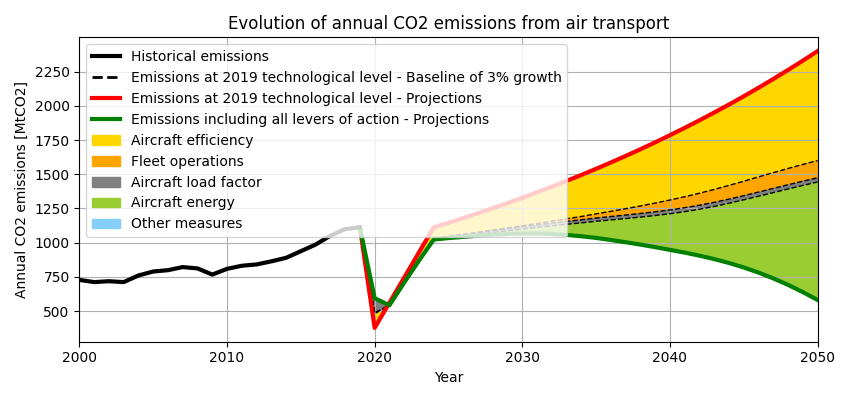

In [17]:
process.plot("air_transport_co2_emissions")